# Pneumonia Detection Using CNN Based on X-Ray Images (Using pretrained weights)

## Import Libraries

In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Load the Saved Model and Data

### Model

In [2]:
# Load the model
model = load_model('../saved/pretrained_pneumonia_cnn.h5')

### Data

In [3]:
# Load the data
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150 # Image size (150 x 150)

def get_training_data(data_dir):
    data = []  # List to hold image arrays
    labels_list = []  # List to hold labels
    
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                data.append(resized_arr)  # Append the image array
                labels_list.append(class_num)  # Append the label
            except Exception as e:
                print(e)
    
    # Convert lists into numpy arrays
    data = np.array(data)  # Shape: (num_images, img_size, img_size)
    labels_list = np.array(labels_list)  # Shape: (num_images,)
    
    return data, labels_list

In [4]:
test, test_labels = get_training_data('../input/test')
x_test = test
y_test = test_labels
x_test = x_test / 255
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

## Predict

In [5]:
predictions = model.predict(x_test)

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the best F1 score
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]

# Apply the best threshold to classify the predictions
classes = (predictions > best_threshold).astype(int).flatten()
print("Optimal Threshold:", best_threshold)
print("Classified Classes:", classes)

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step
Optimal Threshold: 0.46845996
Classified Classes: [0 0 0 ... 0 1 1]


In [6]:
print(classification_report(y_test, classes, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.98      0.98      0.98      1361
   Normal (Class 1)       0.96      0.95      0.95       551

           accuracy                           0.97      1912
          macro avg       0.97      0.97      0.97      1912
       weighted avg       0.97      0.97      0.97      1912



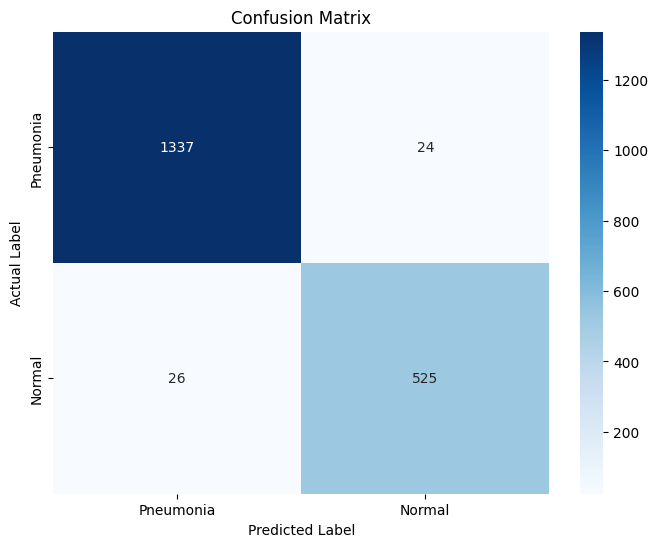

In [7]:
cm = confusion_matrix(y_test, classes)

cm_df = pd.DataFrame(cm, index=['Pneumonia', 'Normal'], columns=['Pneumonia', 'Normal'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()